# Diferenciación automática: Parte 2

### Rodríguez Rosenblueth César Daniel
### Santiago Santos Eva Yazmín
### Hernández De la Vega Alejandro

### NOTA

Este notebook se iniciará en la clase y **debe** hacerse en equipo, con los *mismos miembros* que participaron en la "Tarea4.ipynb". La resolución completa de los ejercicios debe ser enviada como "Tarea5.ipynb".

## Funciones elementales

Lo que se logró en la clase pasada fue, esencialmente, tener una manera de obtener primeras
derivadas para cualquier función racional, esto es, cocientes de polinomios en una variable.

El siguiente paso es incluir más funciones a fin de ampliar la aplicabilidad de lo hecho la vez pasada, en particular a las funciones elementales: $\exp$, $\log$, etc.

La extensión a estas funciones es elemental, y así por ejemplo tenemos:

\begin{eqnarray}
\exp[\vec{f}(x_0)] &=& \big( \exp(f_0),\, f'_0\exp(f_0) \,\big),\\
\log[\vec{f}(x_0)] &=& \big( \log(f_0),\, \frac{f'_0}{f_0} \,\big),\\
\sin[\vec{f}(x_0)] &=& \big( \sin(f_0),\, f'_0\cos(f_0) \,\big),\\
\cos[\vec{f}(x_0)] &=& \big( \cos(f_0),\, -f'_0\sin(f_0) \,\big),\\
\tan[\vec{f}(x_0)] &=& \big( \tan(f_0),\, f'_0\sec^2(f_0) \,\big),\\
\sinh[\vec{f}(x_0)] &=& \big( \sinh(f_0),\, f'_0\cosh(f_0) \,\big),\\
...\\
\end{eqnarray}

Vale la pena enfatizar que la regla de la cadena se utiliza en la segunda componente del 
lado derecho de estas ecuaciones.

In [1]:
include("AutomDiff.jl")

using Base.Test

using AD

## Ejercicio

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.org/en/release-0.4/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea5.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Aprovechen las capacidades de Julia en metaprogramming.

In [16]:
import Base: exp, log, sin, cos, tan, sinh, cosh, tanh, sec, csc, cot
function exp(a::Dual)
    xx = exp(a.fun)
    yy = exp(a.fun)*a.der
    return Dual(xx,yy)
end

function log(a::Dual)
    xx = log(a.fun)
    yy = a.der/a.fun
    return Dual(xx,yy)
end

function sin(a::Dual)
    xx = sin(a.fun)
    yy = cos(a.fun)*a.der
    return Dual(xx,yy)
end

function cos(a::Dual)
    xx = cos(a.fun)
    yy = -sin(a.fun)*a.der
    return Dual(xx,yy)
end

function tan(a::Dual)
    xx = tan(a.fun)
    yy = sec(a.fun)^2*a.der
    return Dual(xx,yy)
end

function sec(a::Dual)
    xx = sec(a.fun)
    yy = sec(a.fun)*tan(a.fun)*a.der
    return Dual(xx,yy)
end

function csc(a::Dual)
    xx = csc(a.fun)
    yy = -csc(a.fun)*tan(a.fun)*a.der
    return Dual(xx,yy)
end

function cot(a::Dual)
    xx = cot(a.fun)
    yy = -csc(a.fun)^2*a.der
    return Dual(xx,yy)
end

function sinh(a::Dual)
    xx = sinh(a.fun)
    yy = cosh(a.fun)*a.der
    return Dual(xx,yy)
end

function cosh(a::Dual)
    xx = cosh(a.fun)
    yy = sinh(a.fun)*a.der
    return Dual(xx,yy)
end

function tanh(a::Dual)
    xx = tanh(a.fun)
    yy = sech(a.fun)^2*a.der
    return Dual(xx,yy)
end


tanh (generic function with 14 methods)

## Ejercicio

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [3]:
function f(x)
    sin(x^3-2/x^6)
end

#Definimos explicitamente su derivada
function f1(x)
    cos(x^3-2/x^6)*(3*x^2+12/x^7)
end

f1 (generic function with 1 method)

Comparamos nuestro calculo con el valor explícito

In [4]:
f(xdual(2))

AD.Dual{Float64}(0.9934213368955197,-1.384934905523464)

In [5]:
f(2),f1(2)

(0.9934213368955197,-1.384934905523464)

A continuación graficamos nuestros cálculos con la representación explicita de la función

In [6]:
using PyPlot

In [7]:
x = linspace(1,5,10000)

#Definimos los arreglos para guardar valores, los que acaban en 'ex' son con las funciones explícitas y los que acaban
#en 'nu' son los cálculos usando duales.
f1ex=similar(x)
f1nu=similar(x)
fex=similar(x)
fnu=similar(x)

for (i,a) in enumerate(x)
    f1ex[i] = f1(a)
    f1nu[i] = f(xdual(a)).der
    fex[i] = f(a)
    fnu[i] = f(xdual(a)).fun
end

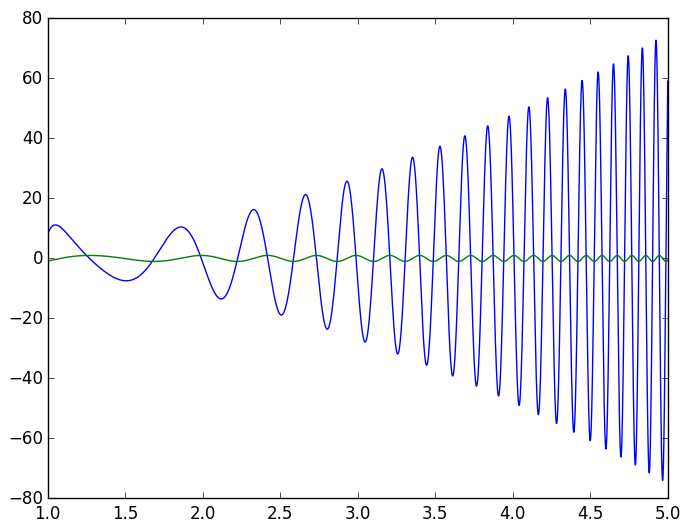

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3d6f295dd0>

In [8]:
plot(x,f1nu)
plot(x,fnu)

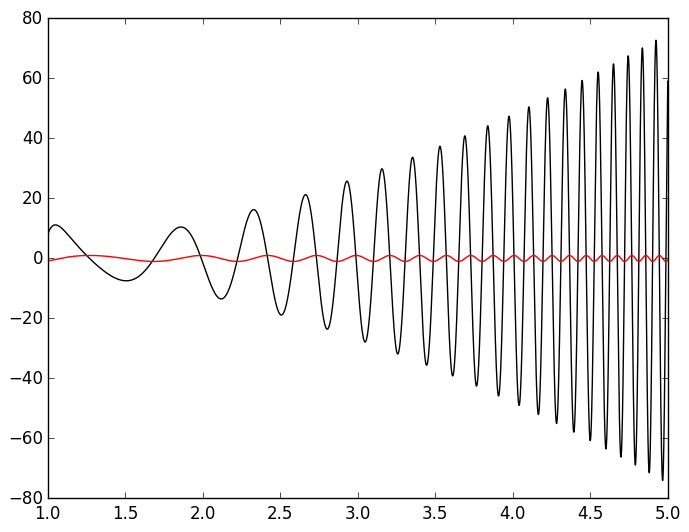

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3d6f1a3f10>

In [9]:
plot(x,f1ex,"k-")
plot(x,fex,"r-")

Con lo que se comprueba que son prácticamente iguales

# Ejercicio

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [10]:
function newton1D(f::Function,x0::Real,n::Int64)
    for i in 1:n
        a = f(xdual(x0))
        x0 = x0 - a.fun/a.der
    end
    return x0
end

newton1D (generic function with 1 method)

In [11]:
#Una comprobación
newton1D(x->x^2,0.1,1000)

1.4686492099827628e-162

In [12]:
newton1D(x->x*sin(2x),1.0,1000)

-10.995574287564276

In [13]:
function Wilkinson6(x)
    return (x-6)*(x-5)*(x-4)*(x-3)*(x-2)*(x-1)
end

Wilkinson6 (generic function with 1 method)

In [14]:
newton1D(x->Wilkinson6(x),2.2,10)

2.0

In [15]:
newton1D(x->Wilkinson6(x),2.45,10)

6.0

# Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea; la idea es empezar a pensar en esto.

Inicialmente podemos tratar de implementar el método empleado en la derivación automática a través de los Duales.
Al extender este tratamiento a derivadas de orden superior, se podría utilizar, por ejemplo, una terna para el 
caso de la segunda derivada, teniendo que la primera componente sería la función, la segunda componente la
primera derivada y la tercera componente la segunda derivada, todas evaluadas en el mismo punto. 
El problema de este método radica en que se vuelven extremadamente complicadas las fórmulas para el producto y la división al calcular derivadas de órdenes muy elevados.